In [131]:
pip install pandas numpy scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [132]:
# Load the dataset
import pandas as pd
#data = {
#    "Hours": [1, 2, 3, 4, 5, 6, 7, 8],
#    "Score": [35, 42, 51, 60, 68, 77, 85, 90]
#}
df = pd.read_csv("student_scores.csv")
print(" Dataset Loaded Successfully!\n")
print(df)
#data['timestamps'] = pd.to_datetime(data['timestamps'])
print(df.head(10))

 Dataset Loaded Successfully!

       name  hours  score gender grades class
0     Aarav      8     76      M      A    9A
1      Riya      5     62      F      B    9B
2     Kabir     10     88      M      A   10A
3      Sana      4     55      F      C    9A
4    Vivaan      7     72      M      B   10B
..      ...    ...    ...    ...    ...   ...
87   Prisha      4     52      F      C    9A
88     Neil     10     88      M      A   12C
89    Rutvi      7     73      F      B   10A
90  Harshit      5     57      M      C    9B
91   Vritti      8     81      F      A   11B

[92 rows x 6 columns]
     name  hours  score gender grades class
0   Aarav      8     76      M      A    9A
1    Riya      5     62      F      B    9B
2   Kabir     10     88      M      A   10A
3    Sana      4     55      F      C    9A
4  Vivaan      7     72      M      B   10B
5  Ishita      6     64      F      B    9C
6   Rohan      3     48      M      D    9B
7   Meera      9     90      F      A   11

In [133]:
# Inspect columns and basic info
print('Columns:', df.columns.tolist())

#1.Dataset Basic Info
print('\nDataset Info:')
print(df.info())


#2.Completeness: Check for missing values:
#Checks if any column has missing/null values.
print('\nDataset Completeness:')
print(df.isnull().sum())


#3.Dataset Consistency: All numeric columns should be numeric.
print('\nDataset Consistency:')
print(df.dtypes)           # Check datatype consistency


Columns: ['name', 'hours', 'score', 'gender', 'grades', 'class']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB
None

Dataset Completeness:
name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64

Dataset Consistency:
name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object


In [134]:
#4.Accuracy: Values realistic or outlier
print('\nDataset Describe:')
print(df.describe())      # Summary stats
#data['hours'].plot(kind='box')

#5.TIME-KEEPING — Is the data up-to-date?
print('\nDataset Time-Keeping:')
print('\nNo timestamps')

#6.BIAS Check — Is data skewed toward 1 user group?
#print('\nDataset Bias')
#print(df['gender'].value_counts(normalize=True))
#print(df['grades'].value_counts(normalize=True))
#df['class'].value_counts(normalize=True)


Dataset Describe:
           hours      score
count  92.000000  92.000000
mean    6.510870  68.836957
std     2.265336  15.692286
min     2.000000  35.000000
25%     5.000000  57.000000
50%     7.000000  70.000000
75%     8.000000  82.000000
max    11.000000  94.000000

Dataset Time-Keeping:

No timestamps


## Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `student_performance_data.csv` (demo dataset) |
| **Description**     | Contains student study behavior and academic performance data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**        | `name`, `hours`, `score`, `gender`, `grades`, `class` |
| **Target Variable** | *None* (Exploratory dataset only) |
| **Number of Rows**  | 92 |
| **Null Handling**   | No missing values detected across any feature |
| **Transformations** | Label encoding applied to `class` → `class_encoded`; datatype validation performed; value distribution and proportion analysis conducted for `gender`, `grades`, and `class` |
| **Owner**           | Student / Notebook Author |
| **Last Updated**    | 2025-12-19 |

In [135]:
##  Separate Features and Labels
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns

print("Categorical Features:", list(categorical))
print("Numerical Features:", list(numerical))

# Encode class column
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#data["class_encoded"] = le.fit_transform(data["grades"])

X = df[["hours"]]
y = df["score"]

Categorical Features: ['name', 'gender', 'grades', 'class']
Numerical Features: ['hours', 'score']


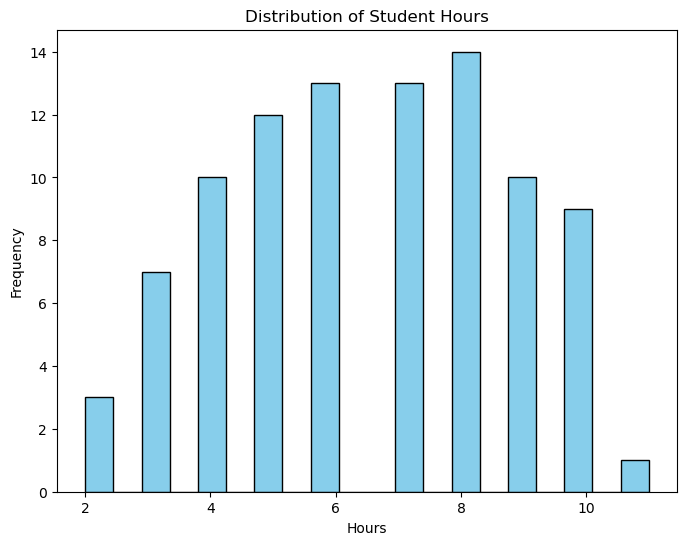

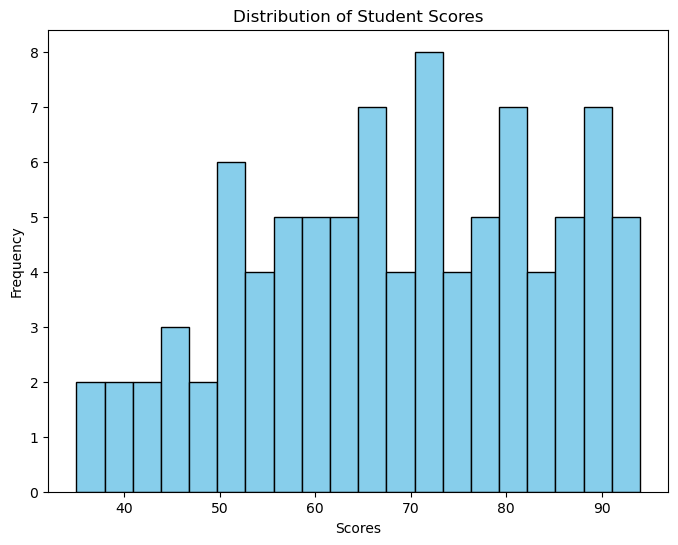

In [136]:
#Data Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(X, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Student Hours')
plt.show()

plt.figure(figsize=(8,6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Student Scores')
plt.show()

In [137]:
#Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
    #stratify=y
)

In [138]:
#Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y) 


print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)
#The coefficient indicates how much the score increases for every additional hour of study.

Model Coefficient (Slope): 6.849544957288835
Model Intercept: 24.240462723738993


In [139]:
#Make predictions
y_pred = model.predict(X_test)
pred_data = {'Y_prediction': y_pred.round(2),
             'Y_test': y_test.reset_index(drop=True)}

prediction_table = pd.DataFrame(pred_data)
prediction_table


,Y_prediction,Y_test
0,79.04,81
1,85.89,84
2,44.79,40
3,37.94,36
4,79.04,76
5,79.04,82
6,72.19,75
7,85.89,85
8,58.49,60
9,44.79,43


In [142]:
new_input=pd.DataFrame([[1]],columns=["hours"])
print(model.predict(new_input))

[31.09000768]


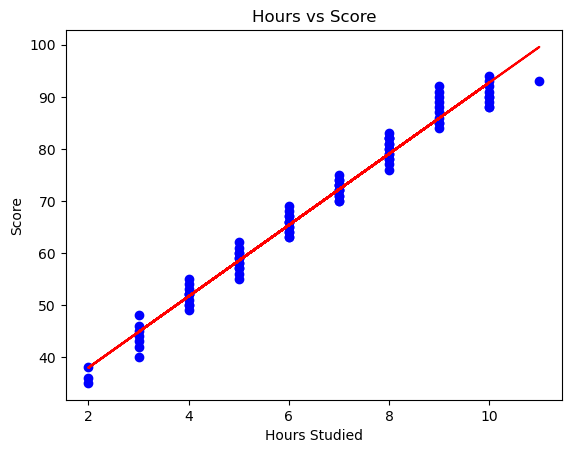

In [143]:
# Plot the line 
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

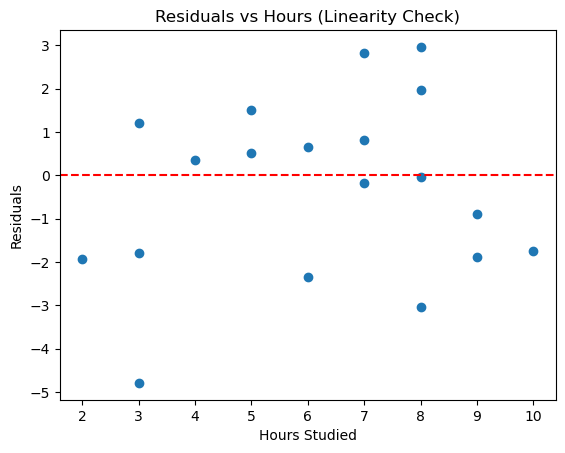

In [144]:
#Linear Regression Assumptions
# Residuals
residuals = y_test - y_pred

# 1. Linearity check (Residuals vs X)
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Hours Studied")
plt.ylabel("Residuals")
plt.title("Residuals vs Hours (Linearity Check)")
plt.show()

In [145]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

#RMSE represents the average error in score prediction.
#For example, an RMSE of 6 means predictions are off by ~6 marks on average.

MSE  : 4.09
RMSE : 2.02
R²   : 0.984


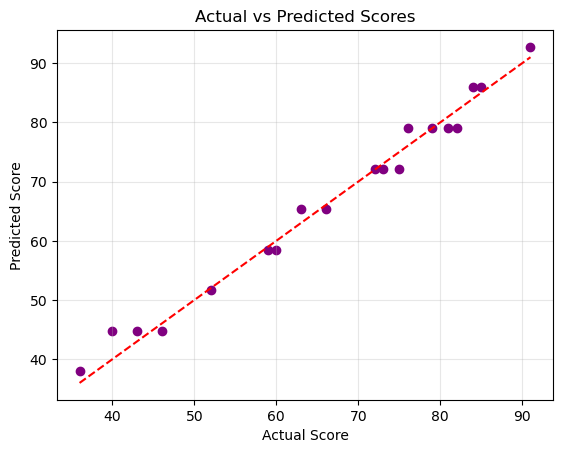

In [146]:
#Actual vs Predicted Plot
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.grid(alpha=0.3)
plt.show()

In [147]:
#Baseline Comparison
# Baseline prediction: mean of training scores
baseline_pred = [y_train.mean()] * len(y_test)

baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print("Baseline MSE:", round(baseline_mse, 2))
print("Baseline R² :", round(baseline_r2, 3))

Baseline MSE: 272.91
Baseline R² : -0.034
